<a href="https://colab.research.google.com/github/pierrout/AIML/blob/main/ArvoreDeDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ##
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
## mostrar a arvore que foi gerada
from sklearn.tree import export_graphviz
import graphviz

In [3]:

base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [5]:
base = base.drop(['Unnamed: 0'], axis=1)

In [6]:
y = base.iloc[:,7].values
coluna_excluir = 7
X = base.iloc[:, [col for col in range(base.shape[1]) if col != coluna_excluir]].values



In [7]:
labelencoder = LabelEncoder()

In [8]:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [10]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

**Onde começa ...**



*   DecisionTreeClassifier: algoritmo de aprendizado de máquina para realizar tarefas de **classificação**. Decisões baseadas em características dos dados.
*   Random_state: controla a **aleatoriedade** do treinamento do modelo. Garantir que o treinamento do modelo sera **reproduzível**,  se botar o valor igual e rodar o código várias vezes vai obter os mesmos resultados. >>> é igual a 1 para garantir a reprodutibilidade nos resultados do modelo.



In [11]:
modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(random_state=1)

In [12]:
previsoes = modelo.predict(X_teste)

**REPARE**: as métricas de acurácia foram mt superiores se comparadas com Naive Bayes ....

In [13]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1: {f1}')

Acuracia: 0.9195, Precisão: [0.72939068 0.68992248 0.9785124  0.88277858], Recall: 0.9195, F1: 0.9197439685137029


**Como visualizar essa árvore ?**

como ela é :
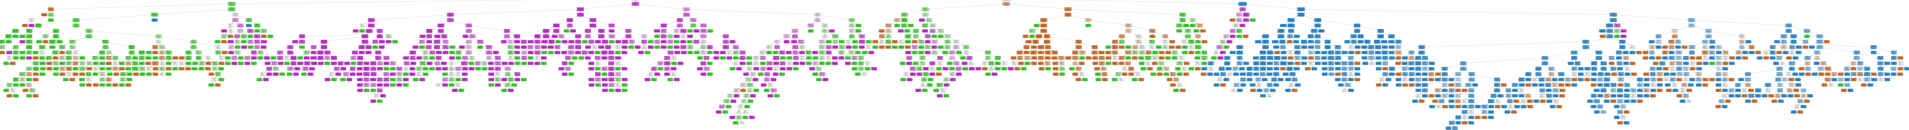


In [14]:
#gera epdf, jpg
dot_data = export_graphviz(modelo, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.582079 to fit


'decision_tree.png'

**detalhe:** Na árvore de decisão é possível alterar a parametrização do modelo (que é chamado de hiperparâmetros)

In [15]:
# profundiade máxima de uma árvore de decisão: max_depth
modelo2 = DecisionTreeClassifier(random_state=1, max_depth=8)
modelo2.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [16]:
previsoes2 = modelo2.predict(X_teste)

In [17]:
# a acuracia foi de 92 para 94, tornou a arvore mais simples
accuracy2 = accuracy_score(y_teste, previsoes2)
precision2 = precision_score(y_teste, previsoes2, average=None)
recall2 = recall_score(y_teste, previsoes2, average='weighted')
f1_2 = f1_score(y_teste, previsoes2, average='weighted')
print(f'Acuracia: {accuracy2}, Precisão: {precision2}, Recall: {recall2}, F1: {f1_2}')

Acuracia: 0.9441666666666667, Precisão: [0.90227273 0.78881988 0.97595376 0.8856383 ], Recall: 0.9441666666666667, F1: 0.942445801347076


In [19]:
dot_data2 = export_graphviz(modelo2, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

graph2 = graphviz.Source(dot_data2)
graph2.render("decision_tree2", format="png")

'decision_tree2.png'

Simplificada:

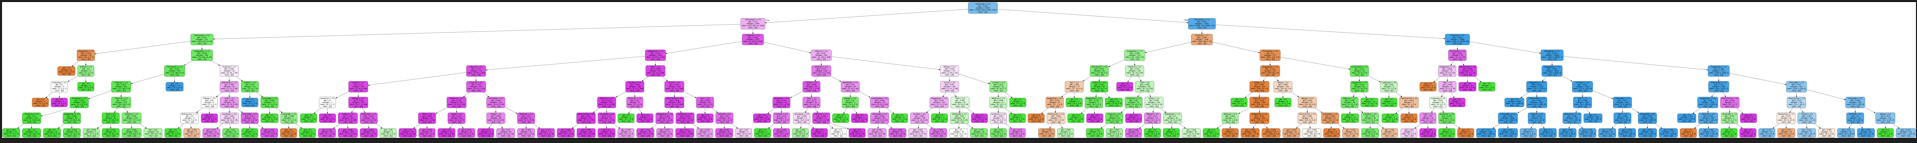


In [20]:
modelo3 = DecisionTreeClassifier(random_state=1, max_depth=8, max_leaf_nodes=8)# quantidade de folhas = 8
modelo3.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=8, random_state=1)

In [22]:
previsoes3 = modelo3.predict(X_teste)

In [23]:
accuracy3 = accuracy_score(y_teste, previsoes3)
precision3 = precision_score(y_teste, previsoes3, average=None)
recall3 = recall_score(y_teste, previsoes3, average='weighted')
f1_3 = f1_score(y_teste, previsoes3, average='weighted')
print(f'Acuracia: {accuracy3}, Precisão: {precision3}, Recall: {recall3}, F1: {f1_3}')

Acuracia: 0.9398333333333333, Precisão: [0.91315136 0.75049116 0.97323489 0.88992042], Recall: 0.9398333333333333, F1: 0.9377075487307824


In [25]:
dot_data3 = export_graphviz(modelo3, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

graph3 = graphviz.Source(dot_data3)
graph3.render("decision_tree3", format="png")

'decision_tree3.png'

**Árvore:**
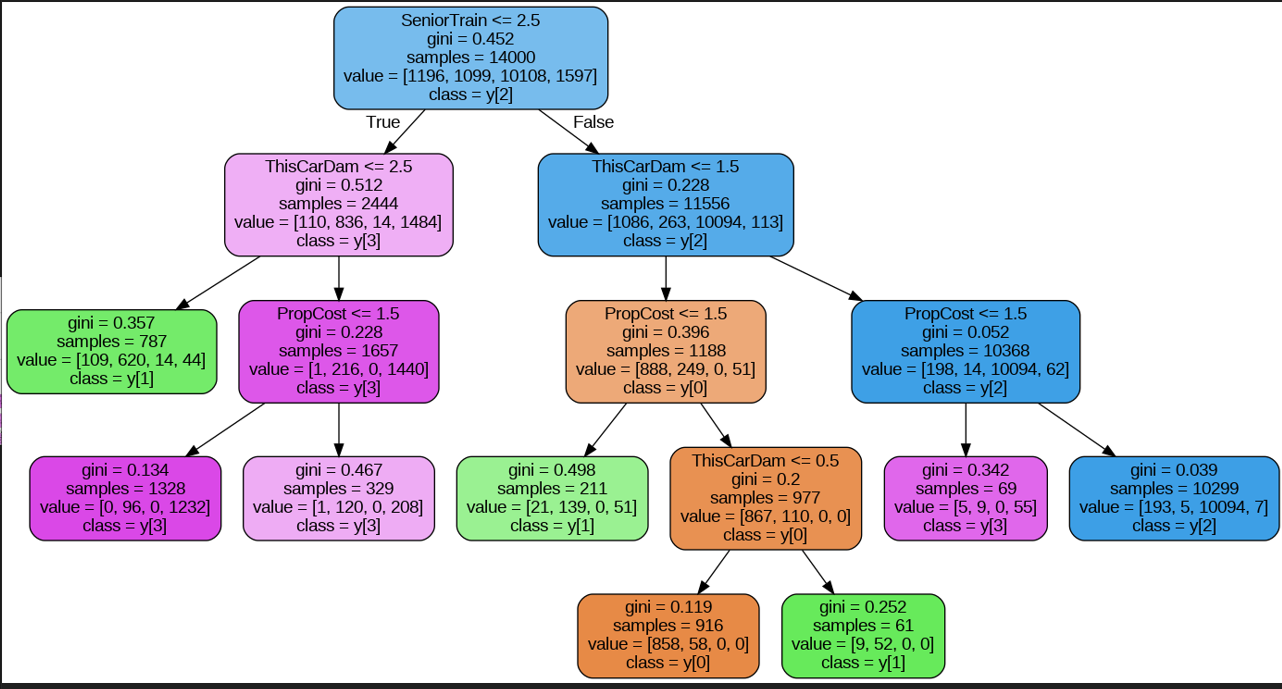